# Aaron Ma

### Environmental and road conditions

Environmental and road conditions play a key part in the probability of an accident occuring. Knowing weather conditions, road type, visibility, urban vs rural can improve road maintenance or infrastructure planning that would allow policymakers to make better informed decisions that would lower the rate of road accident.

#### Key research questions
- Are certain weather conditions more likely to result in multi-vehicle accidents?
- How does visibility level impact pedestrian or cyclist involvement differently in different levels of traffic volume? 
- How do seasonal changes impact the frequency of accidents?

## EDA

### Imports

In [15]:
import os

import altair as alt
import pandas as pd

from toolz.curried import pipe
def json_dir(data, data_dir='altairdata'):
    os.makedirs(data_dir, exist_ok=True)
    return pipe(data, alt.to_json(filename=data_dir + '/{prefix}-{hash}.{extension}') )

# Register and enable the new transformer
alt.data_transformers.register('json_dir', json_dir)
alt.data_transformers.enable('json_dir')

# Handle large data sets (default shows only 5000)
# See here: https://altair-viz.github.io/user_guide/data_transformers.html
alt.data_transformers.disable_max_rows()

alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

### Loading in the data

In [30]:
data = pd.read_csv('../../data/raw/Airbnb_Open_Data.csv', parse_dates=['last review'])
data.head()

/tmp/ipykernel_939/168074796.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../../data/raw/Airbnb_Open_Data.csv', parse_dates=['last review'])


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [31]:
print(f'Dataset shape: \n{data.shape}')
print(f'Dataset columns: \n{data.columns}')
data.info()

Dataset shape: 
(102599, 26)
Dataset columns: 
Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 

In [32]:
data.describe().drop(columns=['id', 'host id'])

,lat,long,Construction year,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000
mean,40.728094,-73.949644,2012.487464,8.135845,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254
min,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.688740,-73.982580,2007.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,40.722290,-73.954440,2012.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,40.762760,-73.932350,2017.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000
max,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,0.055857,0.049521,5.765556,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024


In [26]:
data.describe(include=['object']).drop(columns=['NAME', 'host_identity_verified', 'host name'])

,neighbourhood group,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type,price,service fee,last review,house_rules,license
count,102570,102583,102067,102468,102494,102523,102599,102352,102326,86706,50468,2
unique,7,224,1,1,2,3,4,1151,231,2477,1976,1
top,Manhattan,Bedford-Stuyvesant,United States,US,False,moderate,Entire home/apt,$206,$41,6/23/2019,#NAME?,41662/AL
freq,43792,7937,102067,102468,51474,34343,53701,137,526,2443,2712,2


In [22]:
data.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [34]:
data[data.select_dtypes(include=['int64', 'float64']).columns] = data.select_dtypes(include=['int64', 'float64']).fillna(-1)
data['last review'] = data['last review'].fillna(pd.Timestamp("2099-01-01"))
data[data.select_dtypes(include=['object']).columns] = data.select_dtypes(include=['object']).fillna("Unknown")

In [35]:
data.isna().sum()

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
house_rules                       0
license                           0
dtype: int64

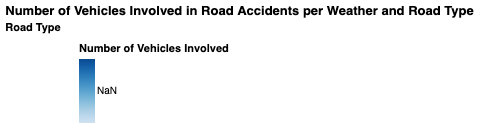

In [11]:
stacked_bar = alt.Chart(accidents).mark_bar().encode(x= "count():Q", 
                                                y = "Weather Conditions:N", 
                                                color = "Number of Vehicles Involved", 
                                                tooltip=['count():Q', 'Number of Vehicles Involved']).facet("Road Type", columns = 1
                                                                                                            ).properties(title='Number of Vehicles Involved in Road Accidents per Weather and Road Type')

stacked_bar

Based on the graph above, there are little to no differences in inter road type comparisons and intra road type comparisons. The number of vehicles involved seems to stay athe same at around 2000 per weather condition.

In [12]:
# Create new Season column to show seasonal data
accidents.loc[accidents['Month'].isin(['March', 'April', 'May']), 'Season'] = 'Spring'
accidents.loc[accidents['Month'].isin(['June', 'July', 'August']), 'Season'] = 'Summer'
accidents.loc[accidents['Month'].isin(['September', 'October', 'November']), 'Season'] = 'Fall'
accidents.loc[accidents['Month'].isin(['December', 'January', 'February']), 'Season'] = 'Winter'

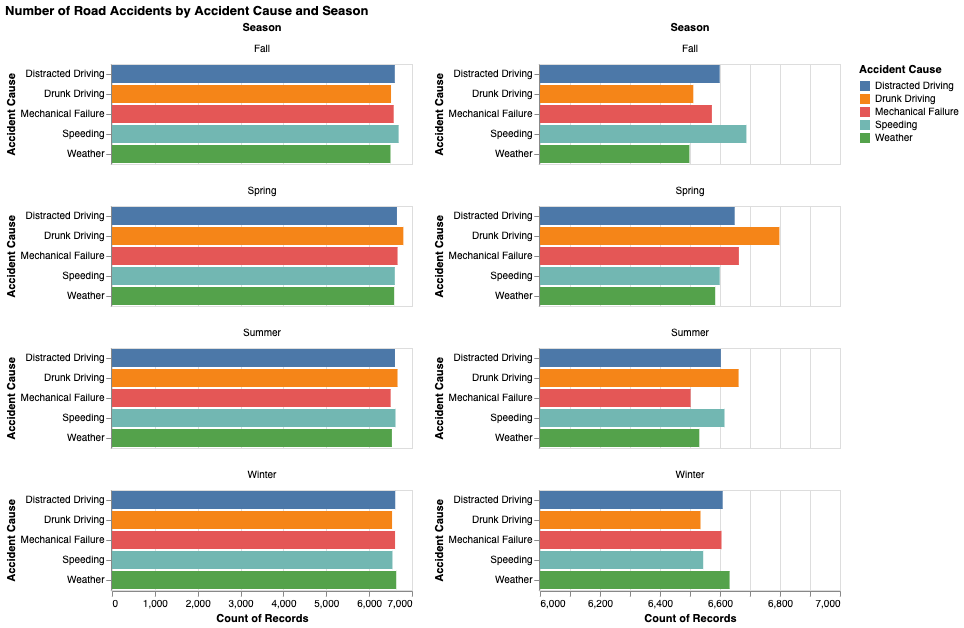

In [13]:
seasonal_accident_cause = alt.Chart(accidents).mark_bar().encode(x="count():Q", y = alt.Y("Accident Cause:N"), color=('Accident Cause:N'), tooltip = ['count():Q']) .facet('Season', columns =1)
seasonal_accident_cause_zoom = alt.Chart(accidents).mark_bar().encode(x=alt.X("count():Q", scale = alt.Scale(domain=(6000,7000))), 
                                                                y = alt.Y("Accident Cause:N"), color = ('Accident Cause:N'),
                                                                tooltip = ['count():Q']).facet('Season', columns =1)

alt.hconcat(seasonal_accident_cause, seasonal_accident_cause_zoom).properties(title='Number of Road Accidents by Accident Cause and Season')

On the faceted chart above, it appears that there are marginal differences between different numbers of accident causes and seasonality. In intra-seasonal analysis, we can see that for different seasons in a 1000 domain scale, different seasons have varying top causes for accidents occuring. For example, Speeding in Fall versus Drunk Driving in Spring.

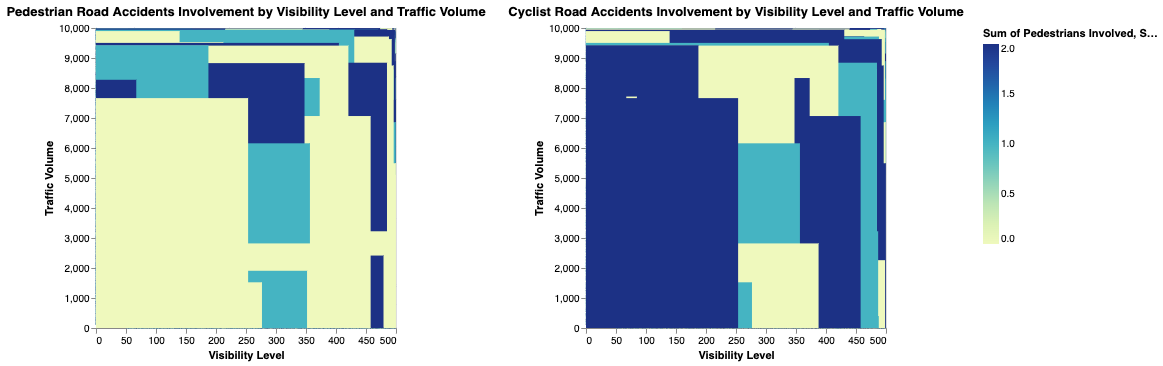

In [14]:
pedestrian_heatmap = alt.Chart(accidents).mark_rect().encode(
        x=alt.X("Visibility Level:Q", title="Visibility Level"),
        y=alt.Y("Traffic Volume:Q", title="Traffic Volume"),
        color='sum(Pedestrians Involved):Q').properties(title='Pedestrian Road Accidents Involvement by Visibility Level and Traffic Volume')

cyclist_heatmap = alt.Chart(accidents).mark_rect().encode(
        x=alt.X("Visibility Level:Q", title="Visibility Level"),
        y=alt.Y("Traffic Volume:Q", title="Traffic Volume"),
        color='sum(Cyclists Involved):Q').properties(title='Cyclist Road Accidents Involvement by Visibility Level and Traffic Volume')

pedestrian_heatmap | cyclist_heatmap

Based on the heatmaps above, we can see that for the pedestrian heatmap, there is a clear center of the most pedestrian involvement in accidents from 250 to 300 visibility and 600 to 9000 traffic volume. There are also outliers where from any point onwards of 450 visibility level, regardless of traffic volume, number of pedestrians involved in an accident are are 2.
However, in regards to the heatmap concerning cyclist involvement, we can observe that at medium to low visibility level (0-250), regardless of traffic volume, the number of cyclist involvement is maximized at 2. There is also an outlier where at greater visibility levels, from 400-450, the number of cyclists involved in accidents are also maximized.

What can be observed is that the pedestrian heatmap shows a much clearer pattern between the three variables while the cyclist heatmap is more indiscriminate as seen by the large hues of dark blue.

## Task Analysis

### **1. Are certain weather conditions more likely to result in multi-vehicle accidents?**
- **Retrieve Value**: Extract `Weather Conditions`, `Number of Vehicles Involved`, and `Road Type`
- **Group**: Groupby `Weather Conditions` and `Road Type`
- **Aggregate**: Caculate average of `Number of Vehicles Involved` per group
- **Analyze**: Analyze relationships between groups
- **Visualize**: Visualize different groups

---

### **2. How does visibility level impact pedestrian or cyclist involvement differently in different levels of traffic volume?**
- **Retrieve Value**: Extract `Visibility Level`, `Pedestrians Involved`, `Cyclists Involved`,  and `Traffic Volume`
- **Group**: Separate by pedestrian or cyclist involvement with `Visibility Level` and `Traffic Volume`
- **Aggregate**: Caculate average of number of pedestrians/cyclists involved at each level of traffic volume and visibility level
- **Analyze**: Analyze relationships between groups
- **Visualize**: Visualize different groups and juxtapose pedestrian and cyclist representations

---

### **3. How do seasonal changes impact the frequency of accidents?**
- **Retrieve Value**: Extract `Month`, and `Accident Cause`
- **Create**: Create new data from `Month`, separating into `Season` by 3 month groups
- **Group**: Group by `Season`
- **Aggregate**: Caculate average of number of accidents occurred per group (season)
- **Analyze**: Analyze relationships between groups
- **Visualize**: Visualize different groups and facet seasonal representation

---